# COMBINE DATA SETS FROM FOLDER

In [84]:
%reset
# Get Librarys
import pandas as pd
import os
import glob
import ast
import numpy as np  
import datetime
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Convert CSV to Time table data frame

In [193]:
def csv_to_timetable(file_name_csv, var_name_time, viewResultingTf):
    df_raw = pd.read_csv(file_name_csv)
        
    print('NOW PROCESSING::: '+ file_name_csv)
    var_names_list = df_raw.columns

    ####### LOOK FOR TIME VARIABLE
    df_dateVarNames = [var_names_list for var_names_list in var_names_list if var_name_time in var_names_list]
    if not bool(df_dateVarNames):
        print("\t Did not find so called ''%s'' variable in data frame" % (var_name_time))
    else: 
        print("\t '%s' variable succesfully found in data frame" % (var_name_time))
        
    df_raw.rename(columns = {var_name_time: "time"}, inplace=True)
    ####### CONVERT DATA FRAME TO TIME SERIES
    df_raw['time'] = pd.to_datetime(df_raw['time'])
    df_raw.set_index('time', inplace = True)
    tf = df_raw;
    
#     df_raw.drop(['time'], axis=1, inplace=True)
    print("\t Data frame converted to time series???")   
    
#     print('\t\t from object eg: ', df_raw[var_name_time][0])
#     print('\t\t to to date  eg: ', tf[var_name_time][0])

    # SORT TIME SERIES BY TIME VARIABLE
    tf = tf.sort_values(by='time')
    print('\t Time series Sorted by time...')
    
    if viewResultingTf:
        print(tf)
#         print(tf.describe())
          
    
    print('\t DONE PROCESSING \n\n\n')  
    return tf


tf_cal_tier_v_county = csv_to_timetable('dtaCSV_CAL_tier_vs_time.csv', 'date', 1) 
tf_stclara_case_v_race = csv_to_timetable('dtaCSV_SC_case_vs_race_vs_time.csv', 'start_date', 1)
# tf_stclara_case_v_race.loc["2020-01-26"]
tf_stclara_tier_v_time = tf_cal_tier_v_county[tf_cal_tier_v_county['county'] == 'Santa Clara']
print(tf_stclara_tier_v_time)

NOW PROCESSING::: dtaCSV_CAL_tier_vs_time.csv
	 'date' variable succesfully found in data frame
	 Data frame converted to time series???
	 Time series Sorted by time...
                county  fips  tier
time                              
2020-08-31        Yuba   115     1
2020-08-31        Mono    51     3
2020-08-31       Modoc    49     4
2020-08-31      Merced    47     1
2020-08-31   Mendocino    45     1
...                ...   ...   ...
2021-06-15  Sacramento    67     3
2021-06-15   Riverside    65     4
2021-06-15      Plumas    63     3
2021-06-15      Shasta    89     3
2021-06-15     Alameda     1     4

[2494 rows x 3 columns]
	 DONE PROCESSING 



NOW PROCESSING::: dtaCSV_SC_case_vs_race_vs_time.csv
	 'start_date' variable succesfully found in data frame
	 Data frame converted to time series???
	 Time series Sorted by time...
            Unnamed: 0                             race_ethnicity  \
time                                                                
2020-01-2

## MERGE TABLES

In [232]:
def plt_Vars_vs_time(df, timevar_name, var1_name, var2_name):
    # creating axes object and defining plot
    ax = df.plot(kind = 'line', x = timevar_name,
                      y = var1_name, color = 'Blue',
                      linewidth = 3, figsize=(20, 5))
    ax2 = df.plot(kind = 'line', x = timevar_name, 
                       y = var2_name, secondary_y = True,
                       color = 'Red',  linewidth = 5,
                       ax = ax)

    #title of the plot
    plt.title(var1_name + "~" + var2_name + "~" + timevar_name)
    #labeling x and y-axis
    ax.set_xlabel(timevar_name, color = 'g')
    ax.set_ylabel(var1_name, color = "b")
    ax2.set_ylabel(var2_name, color = 'r')

    #defining display layout 
    plt.tight_layout()

    #show plot
    plt.show()
    
    

df1 = tf_stclara_case_v_race
df2 = tf_stclara_tier_v_time

df  = pd.merge_ordered(df1, df2, on = 'time', how="outer")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace = True)
count = df["tier"].isna().sum()
print(df.loc['2020-10-12'])
print(count, df.shape)

# df.plot(y='tier')
# plt_Vars_vs_time(df, 'new_cases', 'tier')


# print(sum(pd.isna(df.time)), len(df.time))
# print(df[['time', 'tier']])



Unnamed: 0                  NaN
race_ethnicity              NaN
end_date                    NaN
new_cases                   NaN
_7_day_case_rate            NaN
county              Santa Clara
fips                       85.0
tier                        2.0
Name: 2020-10-12 00:00:00, dtype: object
345 (388, 8)


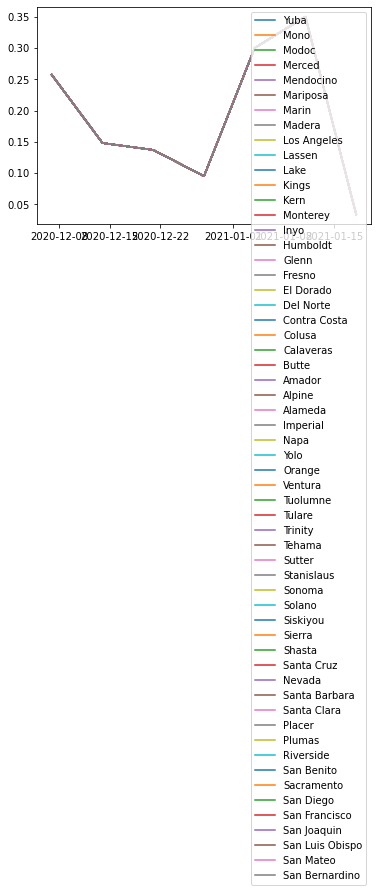

In [477]:


# print(df.head())
fig, ax = plt.subplots()
# plt.plot(df.time, df.tier)

# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
viewCountyOrRegion = 'county'

regionList = df[viewCountyOrRegion].unique()


for reg in regionList:
    df_reg = df.loc[df[viewCountyOrRegion] == reg]
    t = df_reg['time']
    y = df_reg['icu_capacity_percent']
    ax.plot(t, y, label=reg)
    ax.legend()

#     df_reg = df.loc[df['region'] == reg]
# t = df_reg['time']
# y = df_reg['tier']
# plt.plot(t, y, label='Bay Area')   